# Attrition in an Organization || Why Workers Quit?

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

1. Expensive in terms of both money and time to train new employees.
1. Loss of experienced employees
1. Impact in productivity
1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

### Business questions to brainstorm:
1. What factors are contributing more to employee attrition?
1. What type of measures should the company take in order to retain their employees?
1. What business value does the model bring?
1. Will the model save lots of money?
1. Which business unit faces the attrition problem?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 1. Exploratory Data Analysis

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        - Continous & Continous : Scatter plots to know how continous variables interact with each other
        - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        - categorical variables
        - Categorical & Continous : Boxplots, Swamplots or even bar charts
- Detect outliers
- Feature engineering

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [21]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [22]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

No     1233
Yes     237
Name: Attrition, dtype: int64
No    0.84
Yes   0.16
Name: Attrition, dtype: float64


Text(0.5, 1.0, 'Attrition')

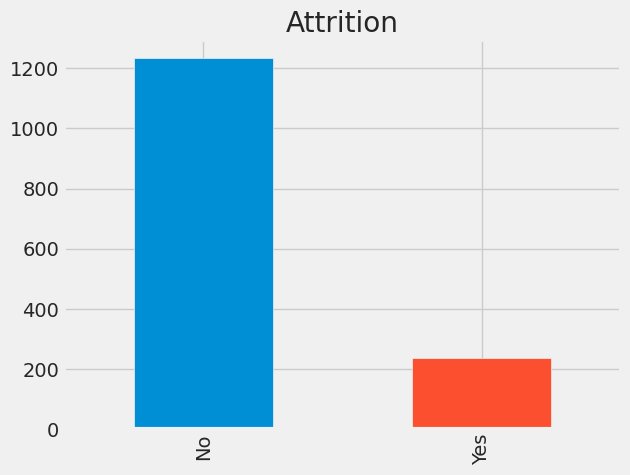

In [23]:
print(df.Attrition.value_counts())
print(df.Attrition.value_counts(normalize=True))
df['Attrition'].value_counts().plot(kind='bar', color=('C0','C1')).set_title('Attrition')

In [24]:
def plot_percentage(df, feature):
    print("Count Valori")
    print(df[feature].value_counts())
    print("Percentage")
    print(df[feature].value_counts(normalize=True))
    #Create plot
    plot = sns.countplot(feature, data=df)
    for p in plot.patches:
        count_percentage = '{:.1f}%'.format(100* p.get_height() / len(df[feature]))
        a_x = p.get_x() + p.get_width() / 2 - 0.05
        a_y = p.get_y() + p.get_height()
        plot.annotate(count_percentage, (a_x, a_y), size = 11)

plt.show()

In [25]:
plot_percentage(df, "Attrition")

Count Valori
No     1233
Yes     237
Name: Attrition, dtype: int64
Percentage
No    0.84
Yes   0.16
Name: Attrition, dtype: float64


TypeError: ignored

In [26]:
df_age = df[["Age", "Attrition"]]
df_age = df_age[df_age["Age"].notnull()]
def in_bin_age(df):
    dtmp = []
    for i in df:
        if(i < 30):
            dtmp.append("20")
        elif(i <40):
            dtmp.append("30")
        elif(i<50):
            dtmp.append("40")
        else:
            dtmp.append("50")
    return dtmp

In [27]:
df_age["Age"] = in_bin_age(df_age["Age"])

In [30]:
sns.factorplot("Age", data=df_age, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')

AttributeError: ignored

In [35]:
print("---- BusinessTravel")
sns.factorplot("BusinessTravel", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# DEPARTMENT
print("---- Department")
sns.factorplot("Department", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# ENVIRONMENTSATISFACTION
print("---- EnvironmentSatisfaction")
sns.factorplot("EnvironmentSatisfaction", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# GENDER
print("---- Gender")
sns.factorplot("Gender", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# JOBLEVEL
print("---- JobLevel")
sns.factorplot("JobLevel", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# JOBSATISFACTION
print("---- JobSatisfaction")
sns.factorplot("JobSatisfaction", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# MARITALSTATUS
print("---- MaritalStatus")
sns.factorplot("MaritalStatus", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# RELATIONSHIPSATISFACTION
print("---- RelationshipSatisfaction")
sns.factorplot("RelationshipSatisfaction", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# WORKLIFEBALANCE
print("---- WorkLifeBalance")
sns.factorplot("WorkLifeBalance", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')

# NUMCOMPANIESWORKED
print("---- NumCompaniesWorked")
sns.factorplot("NumCompaniesWorked", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')



---- BusinessTravel


AttributeError: ignored

## Categorical Features

In [36]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [37]:
len(object_col)

7

In [38]:
object_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [39]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

## Numerical Features

In [40]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [41]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


## Data Visualisation

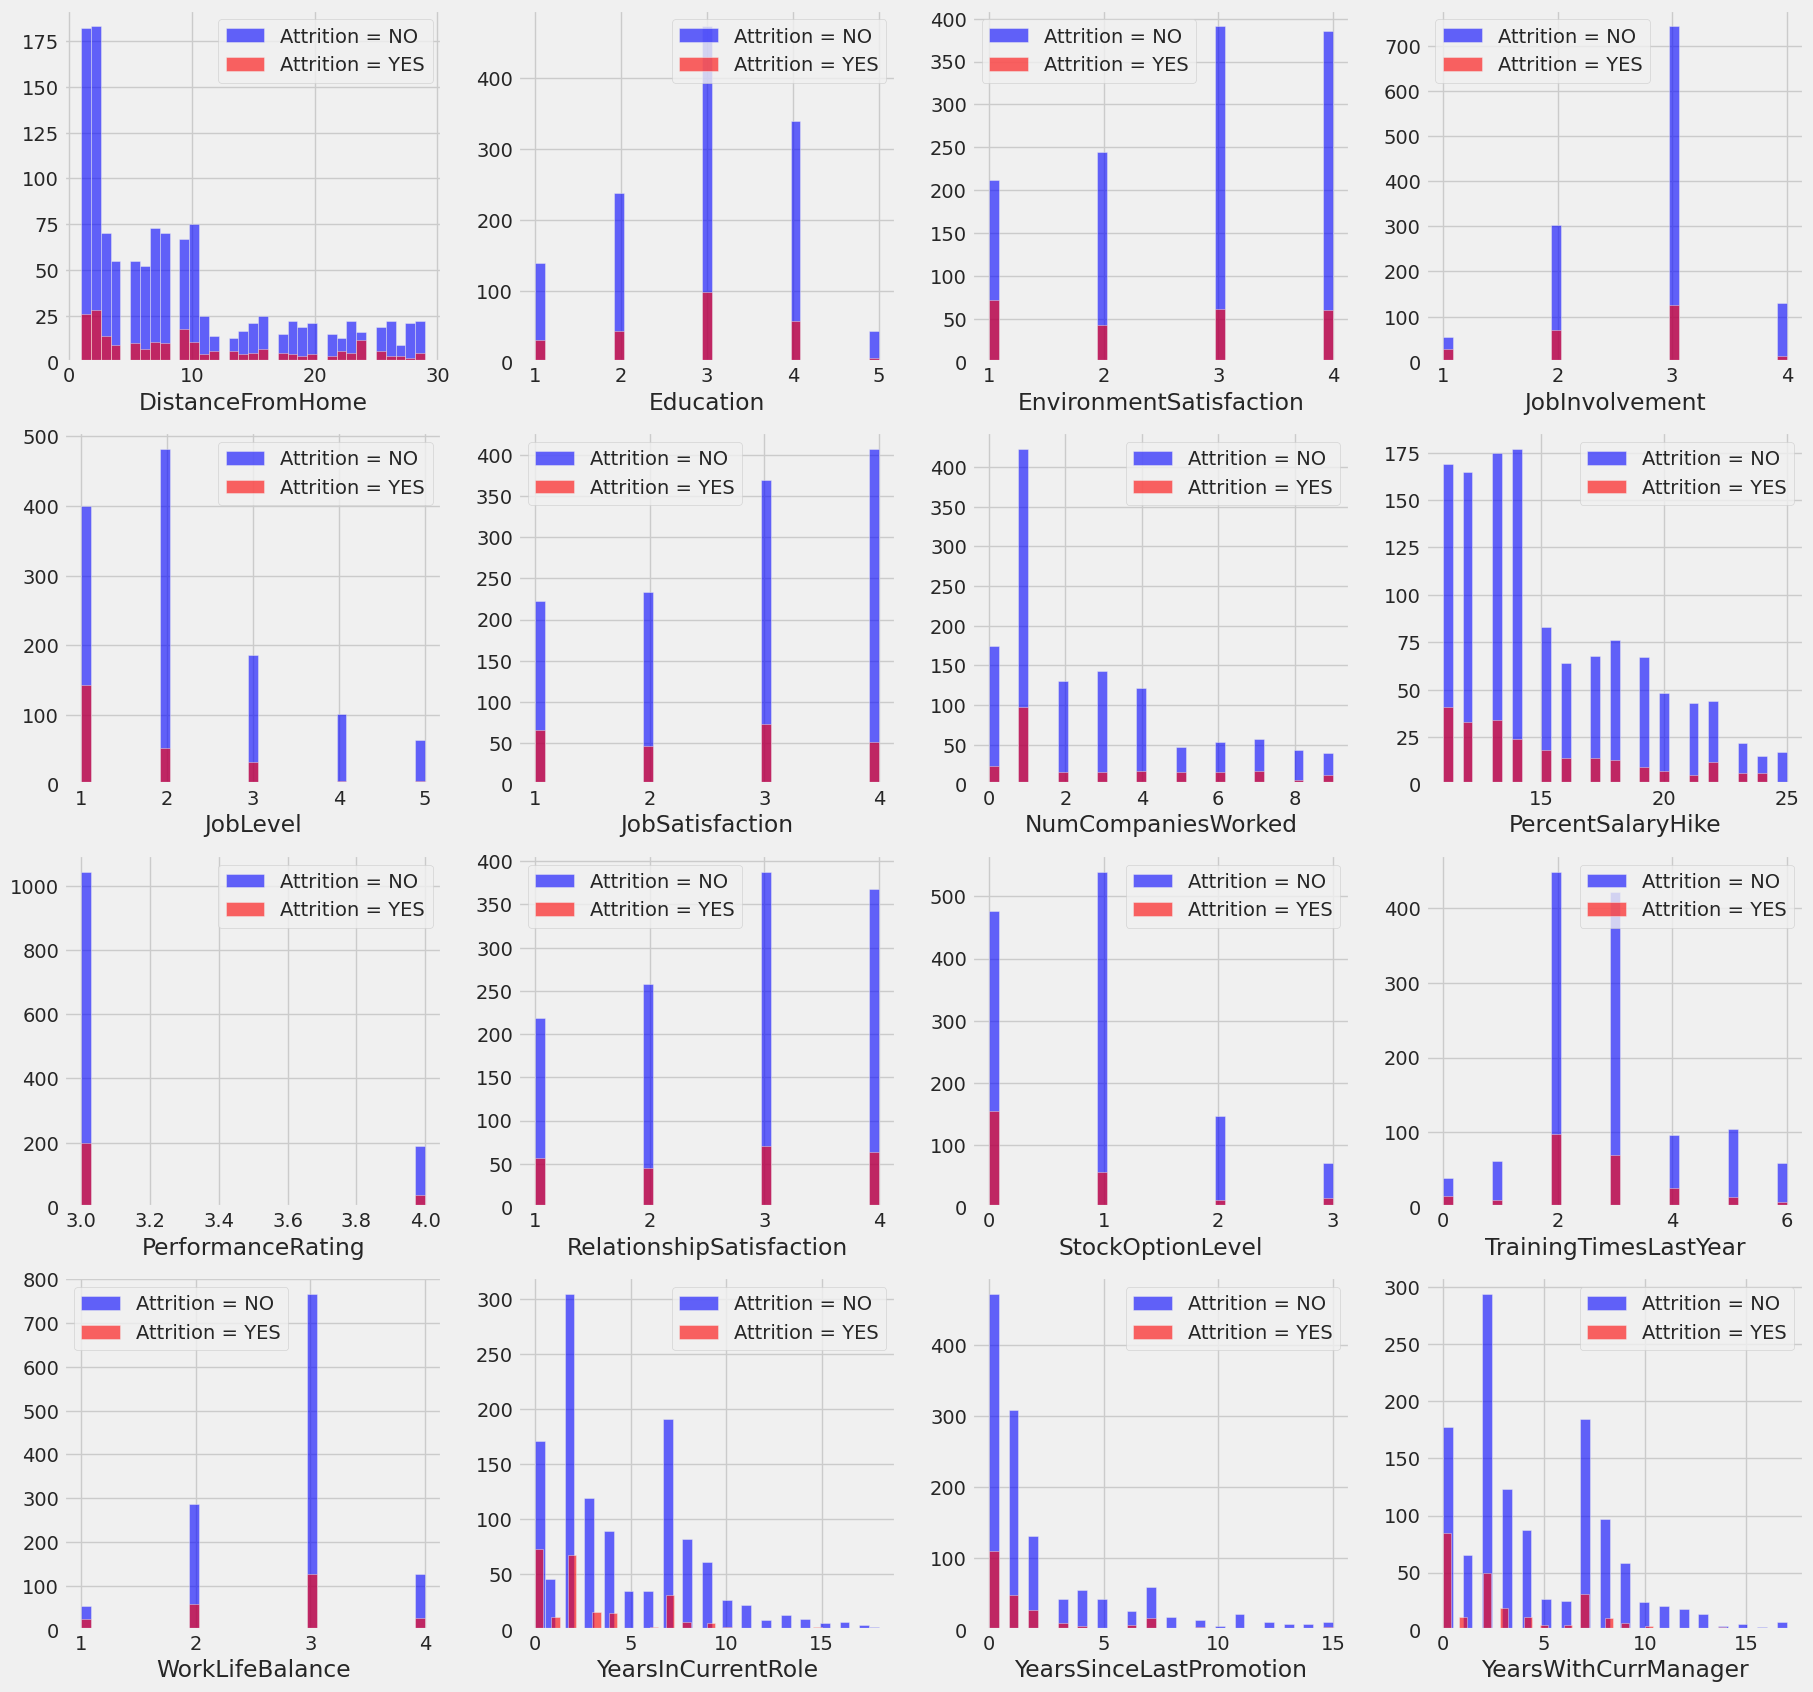

In [42]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

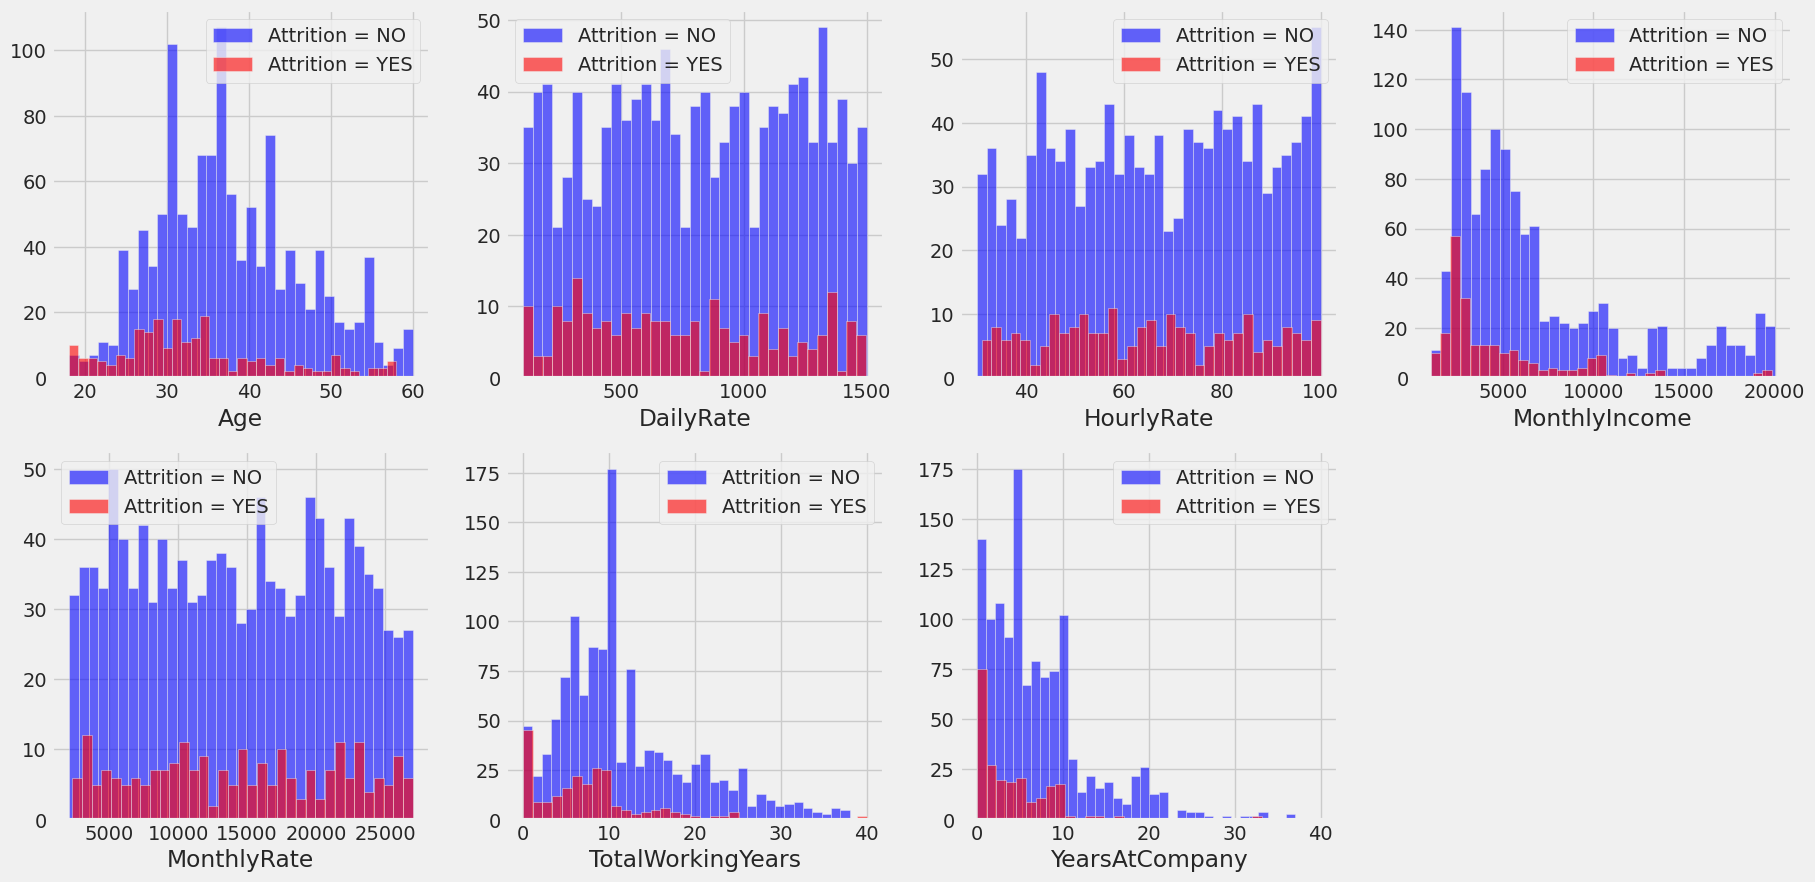

In [43]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

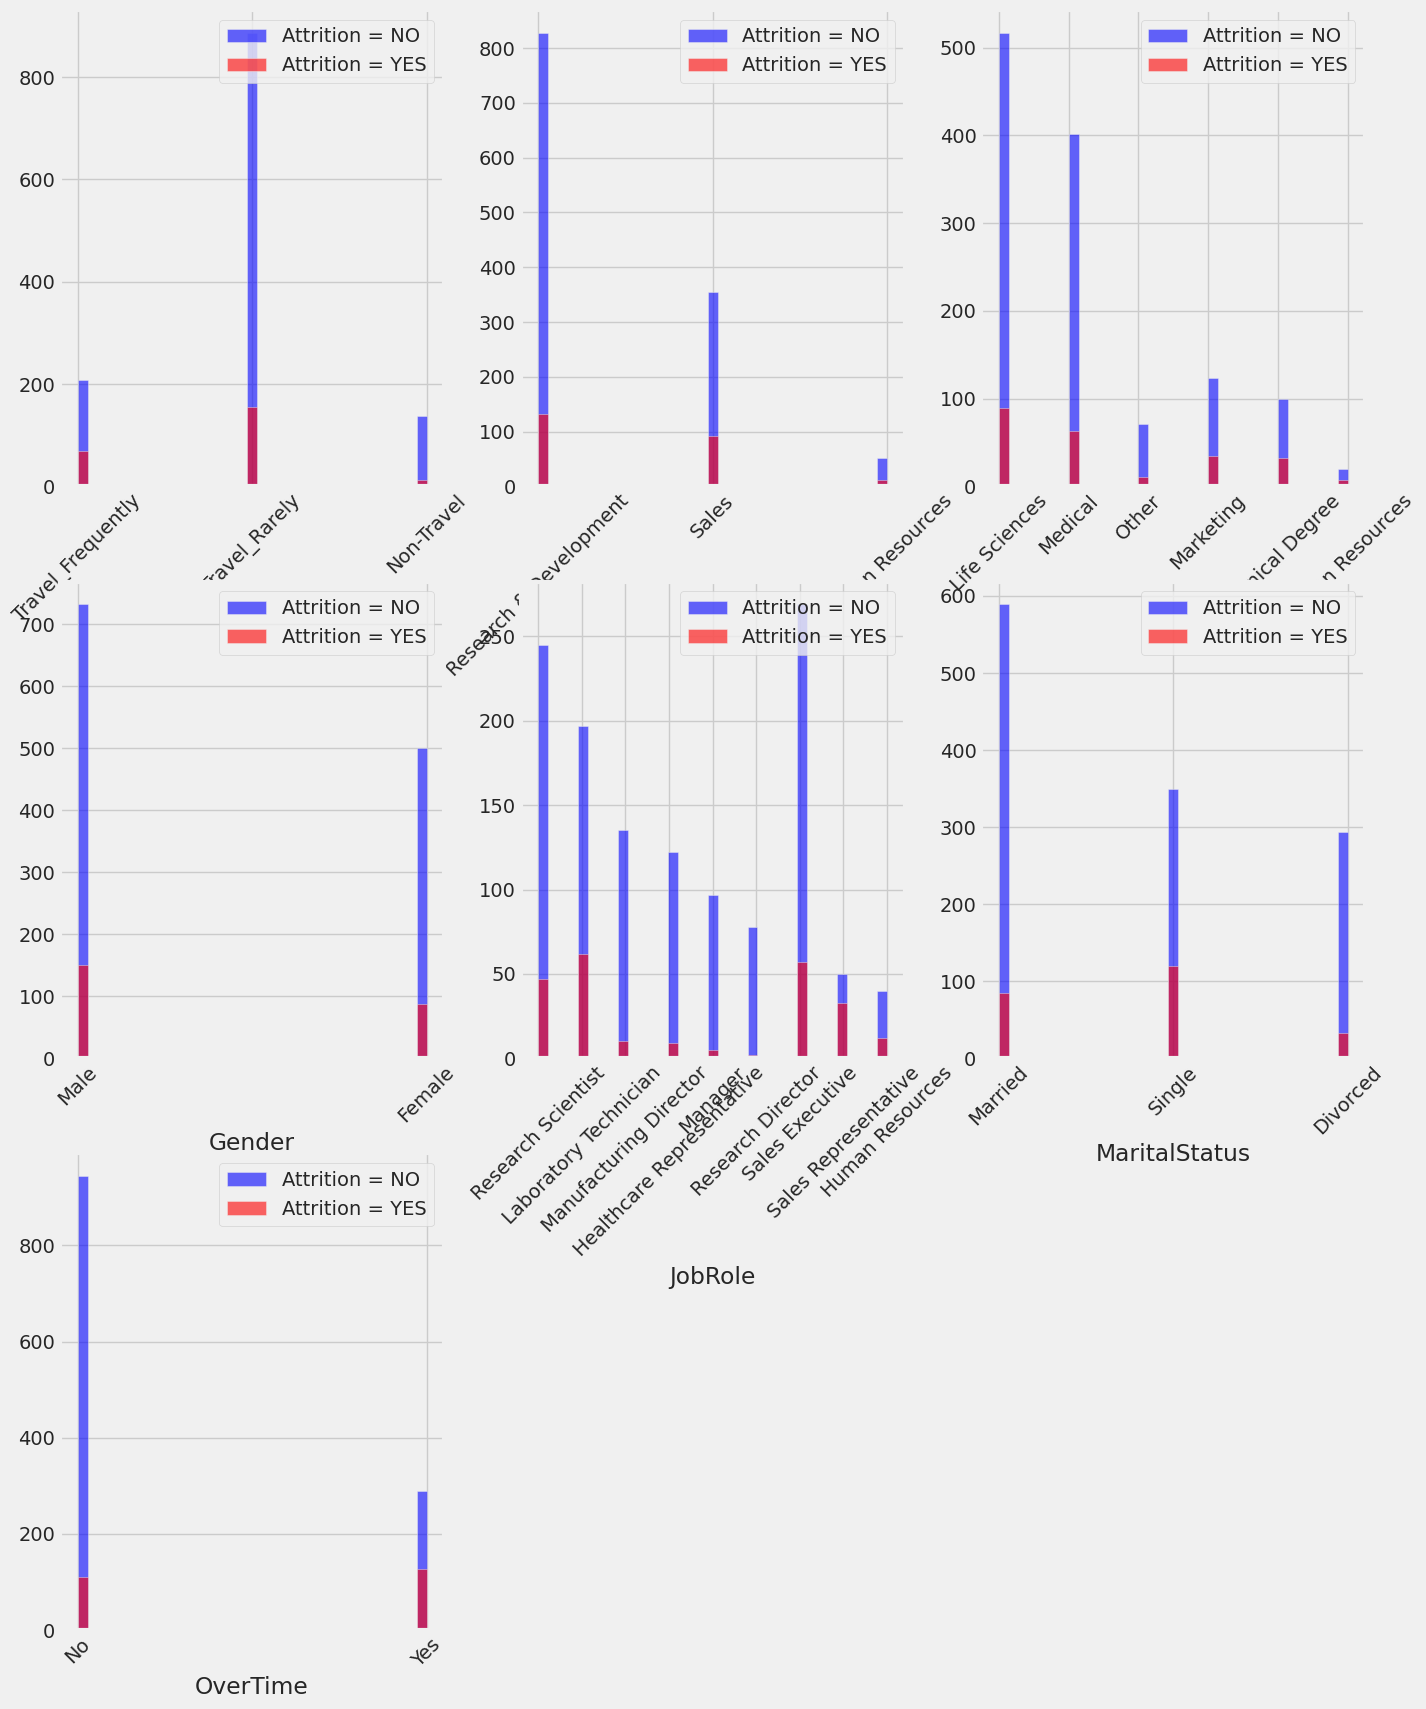

In [44]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(object_col, 1):
    plt.subplot(3, 3, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.xticks(rotation=45)

**Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

***

# 3. Correlation Matrix

In [45]:
df1 = df.copy()

In [46]:
label = LabelEncoder()
df1_enco = df1.apply(label.fit_transform)

<Axes: >

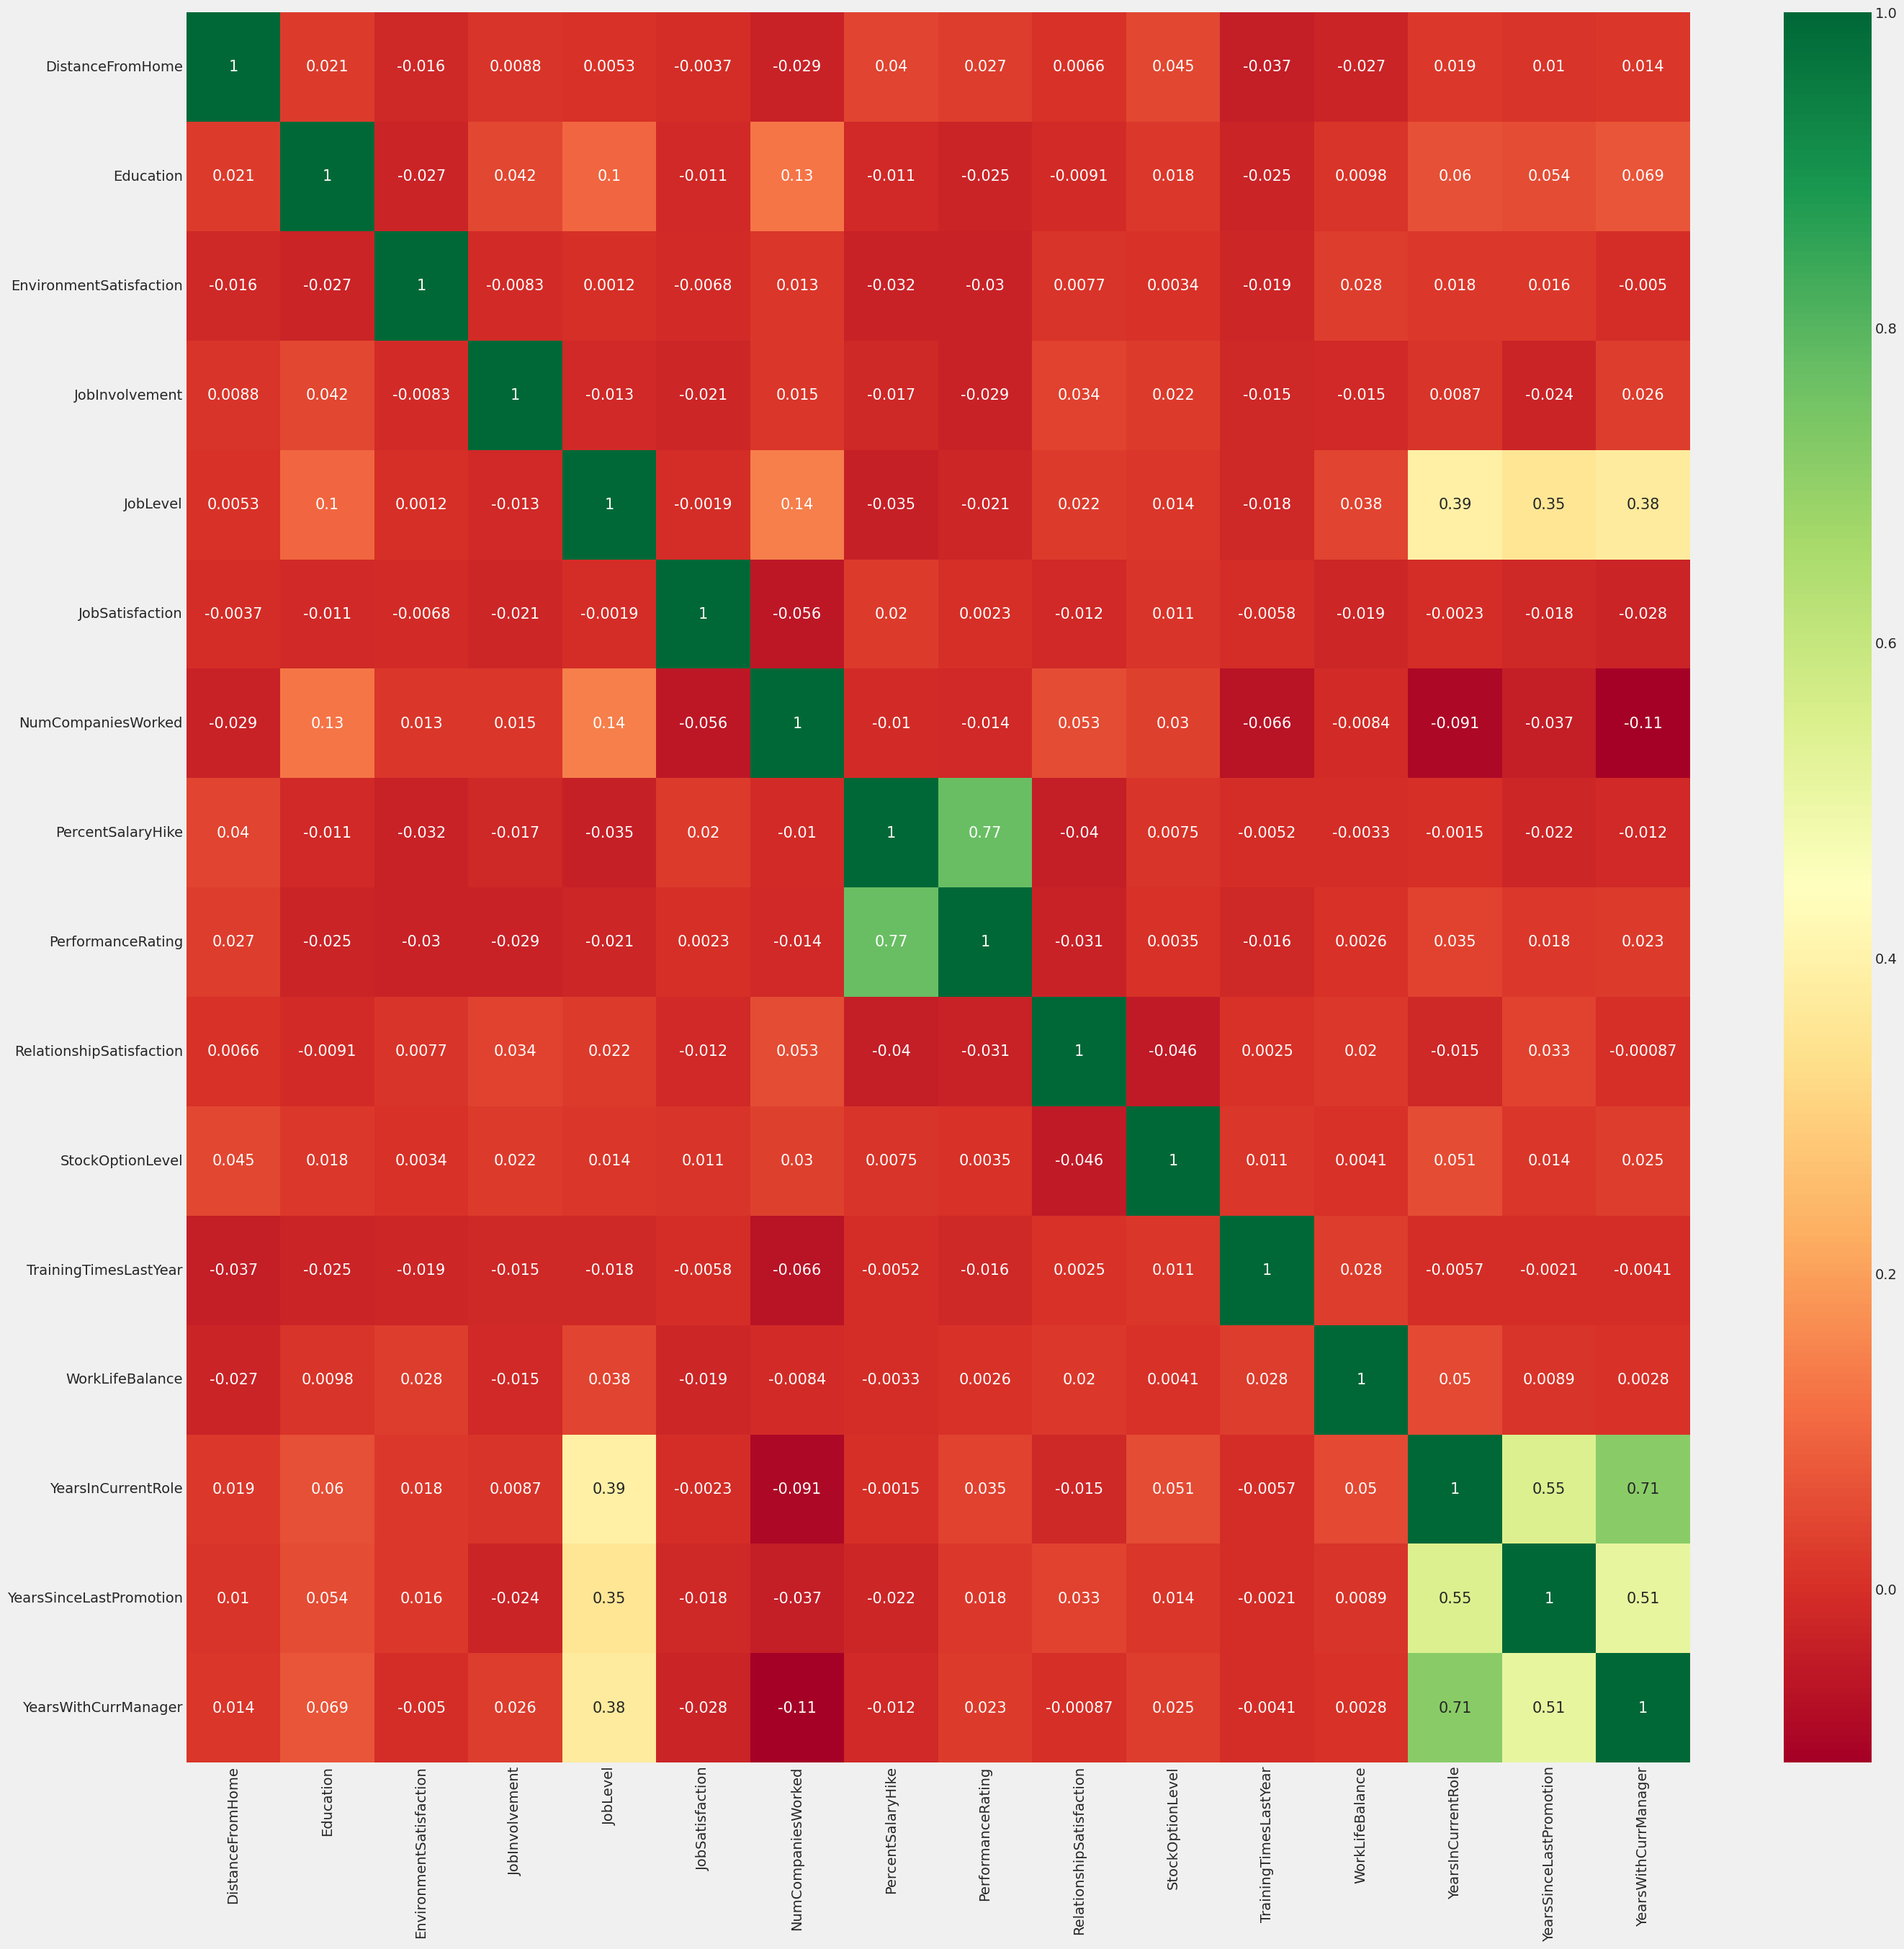

In [47]:
plt.figure(figsize=(30, 30))
sns.heatmap(df1_enco[disc_col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<Axes: >

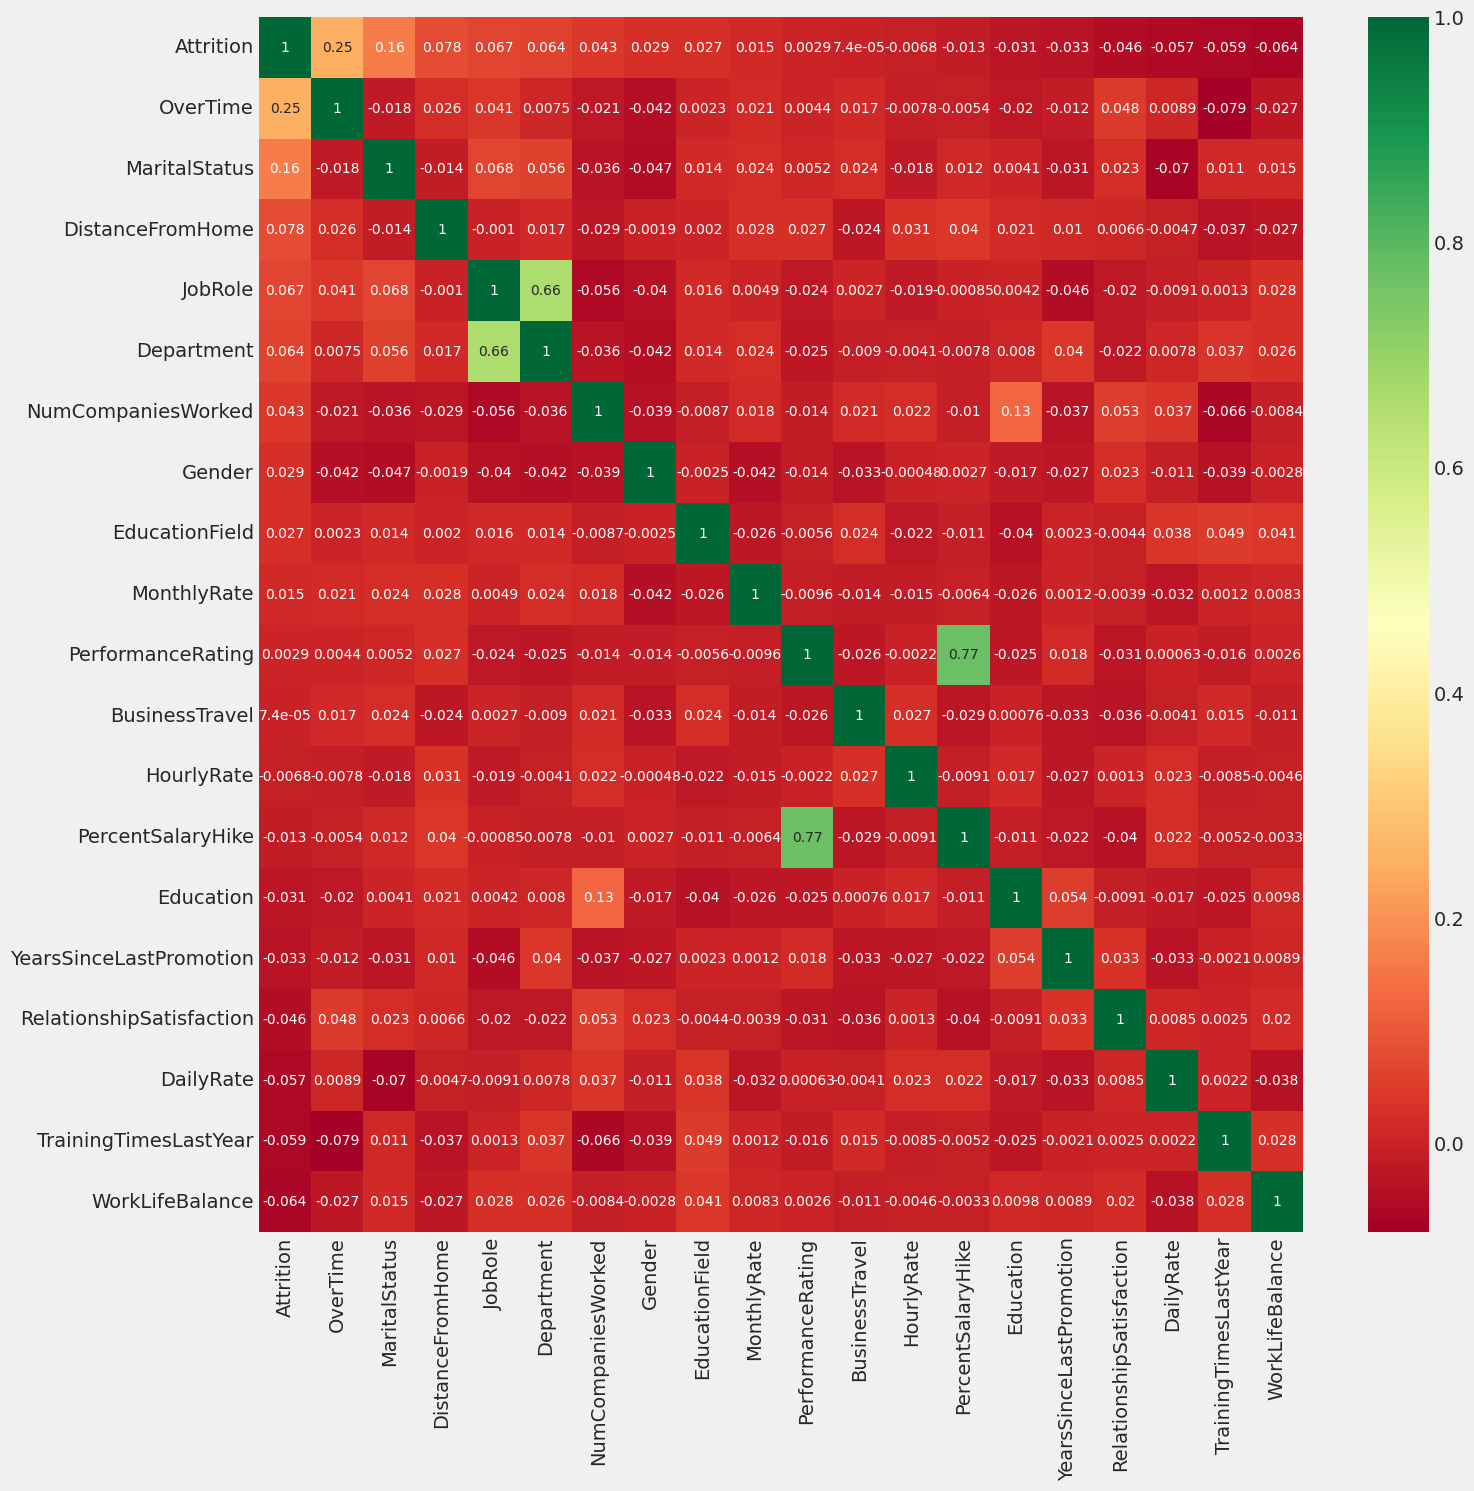

In [48]:
col = df1_enco.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df1_enco[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

<Axes: >

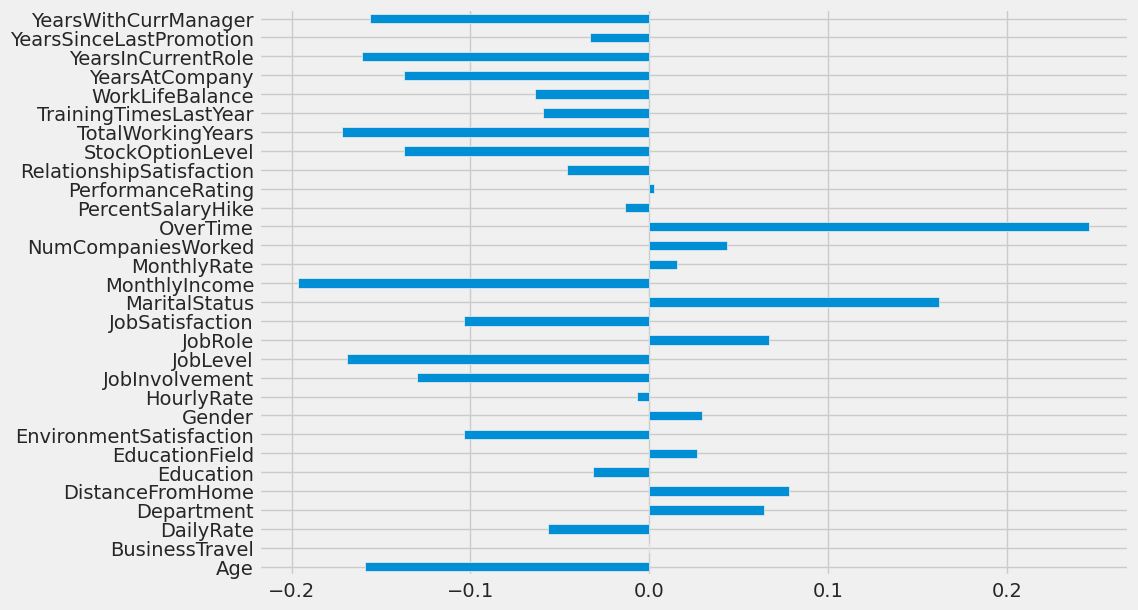

In [49]:
df1_enco.drop('Attrition', axis=1).corrwith(df1_enco.Attrition).plot(kind='barh', figsize=(10, 7))

**Analysis of correlation results (sample analysis):**
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

# 4. Data Processing

In [50]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [51]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [52]:
data.shape

(1470, 136)

<Axes: >

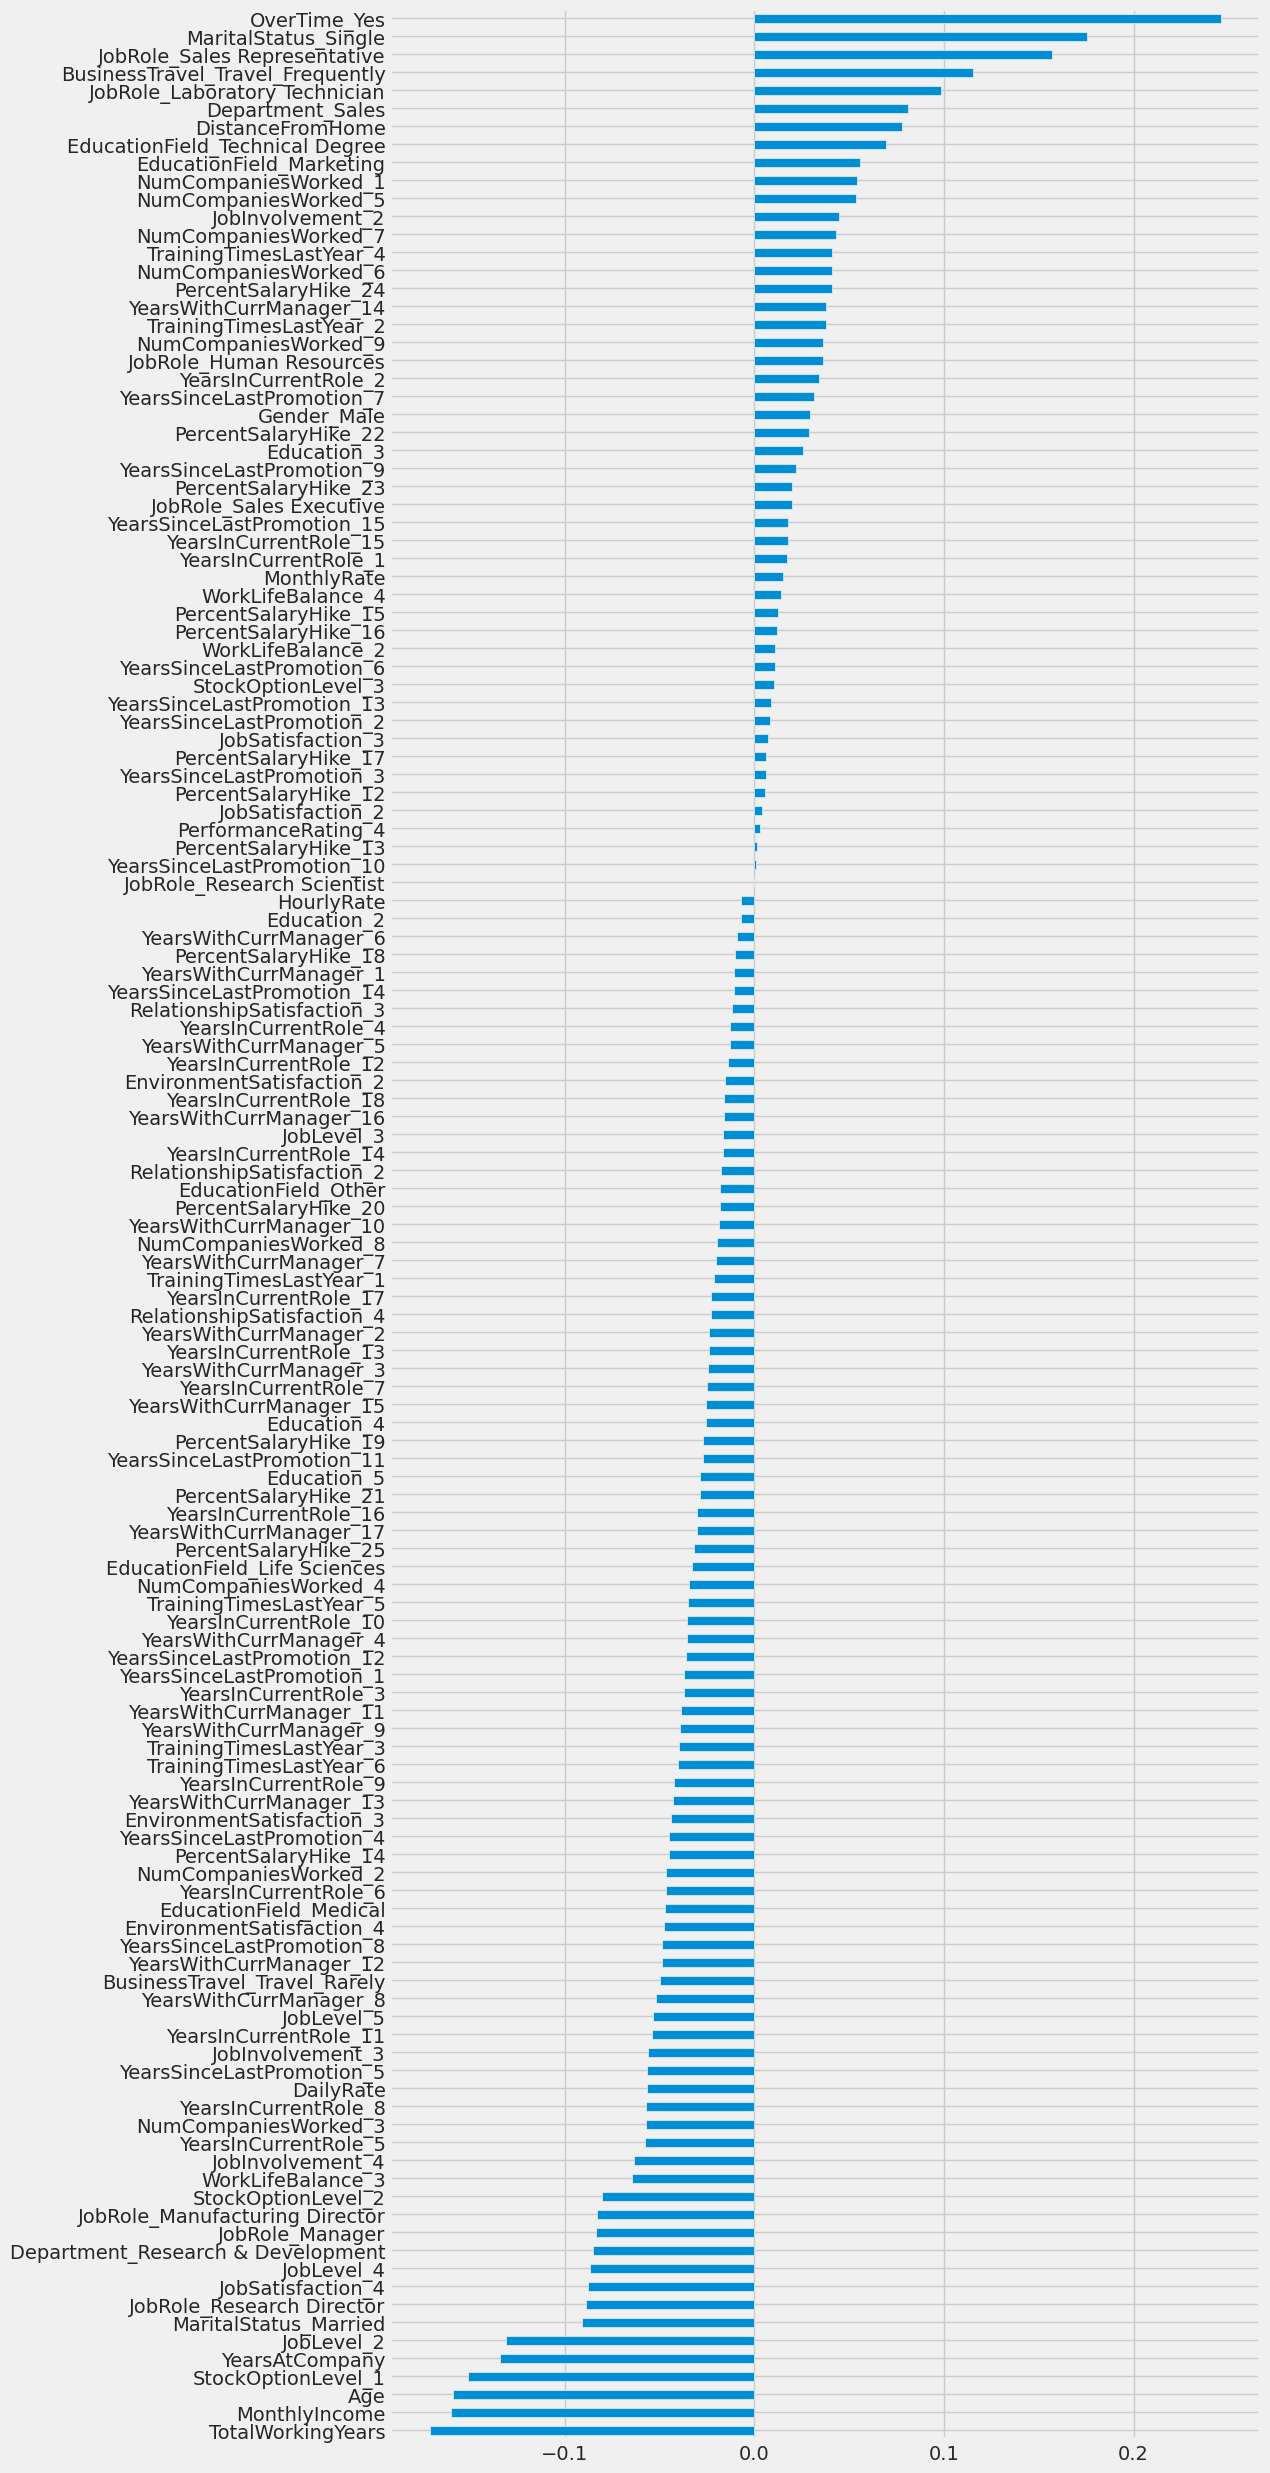

In [53]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [54]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

# 5. Applying machine learning algorithms

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = RobustScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [56]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

## What defines success?
We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of `83.90%`.


In [57]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [58]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 5. 1. Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)
y_pred_log = lr_classifier.predict(X_test)


print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 92.03%
_______________________________________________
Classification Report:	Precision Score: 91.18%
			Recall Score: 56.02%
			F1 score: 69.40%
_______________________________________________
Confusion Matrix: 
 [[854   9]
 [ 73  93]]

Test Result:
Accuracy Score: 87.07%
_______________________________________________
Classification Report:	Precision Score: 68.42%
			Recall Score: 36.62%
			F1 score: 47.71%
_______________________________________________
Confusion Matrix: 
 [[358  12]
 [ 45  26]]



In [61]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(lr_classifier, X_test_std, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Stay', 'Churn'])

ImportError: ignored

In [62]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)

NameError: ignored

In [63]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})
print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))

print(sorted(incorrect_predictions))

      Actual  Predicted
397        0          1
832        0          1
483        0          1
456        0          1
1342       0          1
...      ...        ...
416        0          1
1098       0          1
514        1          0
1442       1          1
268        0          0

[441 rows x 2 columns]
1    290
0    151
Name: Predicted, dtype: int64
0    370
1     71
Name: Actual, dtype: int64
Number of incorrect Predictions: 259
['Actual', 'Predicted']


## 5. 2. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1200,
#                                      bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rand_forest.fit(X_train, y_train)

y_pred_rf = rand_forest.predict(X_test)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)

In [ ]:
df = feature_imp(X, rand_forest)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))

print(sorted(incorrect_predictions))

## 5. 3. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train_std, y_train)

y_pred_svc = svc.predict(X_test)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svc})
print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))

print(sorted(incorrect_predictions))

## 5. 4. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rand_forest, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)

In [ ]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))

print(sorted(incorrect_predictions))

## 6. Balance the dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_roc

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_std, y_train)

y_pred0 = clf.predict(X_test_std)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

# ROC curve

In [ ]:
y_score = clf.predict_proba(X_test_std)
plot_roc(y_test, y_score)
plt.show()

In [ ]:
y_score = clf.predict_proba(X_test_std)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

In [ ]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Undersampling

### Random Under Sampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Condensed Nearest Neighbour

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Tomek Links

In [ ]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### Edited Nearest Neighbors

In [ ]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler-

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### ADASYN

In [ ]:
ada = ADASYN(random_state=42)
X_res_ada, y_res_ada = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res_ada))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res_ada)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_ada, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res_ada, y_res_ada)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Analysis with balanced dataset

### Robust Scaler

Robust scaler = Scale features using statistics that are robust to outliers.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res_ada, y_res_ada, test_size=0.3, random_state=42,
                                                    stratify=y_res_ada)

scaler = RobustScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X_res_ada)

## 6. 1. Logistic Regression

In [64]:
lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)
y_pred_log = lr_classifier.predict(X_test_std)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)


Train Result:
Accuracy Score: 92.03%
_______________________________________________
Classification Report:	Precision Score: 91.18%
			Recall Score: 56.02%
			F1 score: 69.40%
_______________________________________________
Confusion Matrix: 
 [[854   9]
 [ 73  93]]

Test Result:
Accuracy Score: 87.07%
_______________________________________________
Classification Report:	Precision Score: 68.42%
			Recall Score: 36.62%
			F1 score: 47.71%
_______________________________________________
Confusion Matrix: 
 [[358  12]
 [ 45  26]]



In [65]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})
#print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))

#print(sorted(incorrect_predictions))

0    403
1     38
Name: Predicted, dtype: int64
0    370
1     71
Name: Actual, dtype: int64
Number of incorrect Predictions: 57


In [66]:
# Stampa la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(conf_matrix)

# Stampa il report di classificazione
class_report = classification_report(y_test, y_pred_log)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[358  12]
 [ 45  26]]


NameError: ignored

In [70]:
y_probabilities = lr_classifier.predict_proba(X_test_std)

# Estrai le score associate alla classe positiva
y_scores = y_probabilities[:, 1]

# Creazione di un DataFrame con etichette reali, predizioni e score
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log, 'Score': y_scores})

# Stampa il DataFrame
print(results_df)

      Actual  Predicted  Score
397        0          0   0.12
832        0          0   0.02
483        0          0   0.02
456        0          0   0.04
1342       0          0   0.25
...      ...        ...    ...
416        0          0   0.27
1098       0          0   0.01
514        1          1   0.77
1442       1          0   0.23
268        0          0   0.02

[441 rows x 3 columns]


In [83]:
probs = lr_classifier.predict_proba(X_train_std)[:, 1]

In [86]:
np.concatenate([probs, y_scores])

array([0.13182429, 0.65370593, 0.00284155, ..., 0.76669818, 0.23202371,
       0.02439745])

In [87]:
results_df = pd.DataFrame({'Actual': np.concatenate([y_train, y_test]), 'Score': np.concatenate([probs, y_scores])})

In [88]:
results_df.to_csv('results.csv')

from google.colab import files
files.download("results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_res_ada, y_res_ada)

# Ottenere i coefficienti e le relative feature
coefficients = lr_classifier.coef_[0]
feature_names = X_res_ada.columns

# Creazione di un DataFrame per la visualizzazione
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordinamento per valore assoluto
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=True)


# Visualizzazione dei coefficienti
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.show()

# Visualizzazione dei coefficienti in valore assoluto
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Abs_Coefficient'], color='skyblue')
plt.title('Absolute Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.show()

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_res_ada, y_res_ada)

# Ottenere i coefficienti e le relative feature
coefficients = lr_classifier.coef_[0]
feature_names = X_res_ada.columns

# Creazione di un DataFrame per la visualizzazione
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordinamento per valore assoluto
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=True)

# Seleziona solo i primi 20 coefficienti
top_20_coefficients = coefficients_df.tail(20)

# Visualizzazione dei coefficienti
plt.figure(figsize=(10, 6))
plt.barh(top_20_coefficients['Feature'], top_20_coefficients['Coefficient'], color='skyblue')
plt.title('Logistic Regression Coefficients (Top 20)')
plt.xlabel('Coefficient Value')
plt.show()

# Visualizzazione dei coefficienti in valore assoluto
plt.figure(figsize=(10, 6))
plt.barh(top_20_coefficients['Feature'], top_20_coefficients['Abs_Coefficient'], color='skyblue')
plt.title('Absolute Logistic Regression Coefficients (Top 20)')
plt.xlabel('Absolute Coefficient Value')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Definizione della scala di colori
cmap = plt.get_cmap("viridis")
#norm = plt.Normalize(results_df['Score'].min(), results_df['Score'].max())

# Creazione dello scatter plot con mappa di colori
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(results_df['Actual'], results_df['Score'], c=results_df['Score'], cmap=cmap, s=20)

# Aggiunta della barra dei colori
sm = ScalarMappable(cmap=cmap)
sm.set_array([])  # Non ha bisogno di un array, ma è necessario impostare uno
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Score')

# Personalizzazione
ax.set_title('Scatter Plot of Scores with Color Gradient')
ax.set_xlabel('Actual Class')
ax.set_ylabel('Score')

plt.show()


## 6. 2. Random Forest Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res_ada, y_res_ada, test_size=0.3, random_state=42,
                                                    stratify=y_res_ada)

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=1500,
                                     bootstrap=True,
                                     oob_score=True
                                    )
rand_forest.fit(X_train, y_train)

y_pred_rf = rand_forest.predict(X_test)


print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
#print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))



In [ ]:
# Stampa la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Stampa il report di classificazione
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report)

In [ ]:
y_probabilities = rand_forest.predict_proba(X_test)

# Estrai le score associate alla classe positiva
y_scores = y_probabilities[:, 1]

# Creazione di un DataFrame con etichette reali, predizioni e score
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf, 'Score': y_scores})

# Stampa il DataFrame
print(results_df)

In [ ]:
df = feature_imp(X, rand_forest)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

## 6. 3. Support Vector Machine

In [ ]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train_std, y_train)

y_pred_svc = svc.predict(X_test_std)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svc})
#print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))


In [ ]:
# Stampa la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Stampa il report di classificazione
class_report = classification_report(y_test, y_pred_svc)
print("Classification Report:")
print(class_report)

In [ ]:
y_probabilities = svc.predict_proba(X_test_std)

# Estrai le score associate alla classe positiva
y_scores = y_probabilities[:, 1]

# Creazione di un DataFrame con etichette reali, predizioni e score
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svc, 'Score': y_scores})

# Stampa il DataFrame
print(results_df)

In [ ]:
print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

## 6. 4. XGBoost classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res_ada, y_res_ada, test_size=0.3, random_state=42,
                                                    stratify=y_res_ada)

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
#print(results_df)

print(results_df.Predicted.value_counts())
print(results_df.Actual.value_counts())

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

print("Number of incorrect Predictions: %s" % len(incorrect_predictions))

print(sorted(incorrect_predictions))

In [ ]:
# Stampa la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)

# Stampa il report di classificazione
class_report = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(class_report)

In [ ]:
y_probabilities = lr_classifier.predict_proba(X_test)

# Estrai le score associate alla classe positiva
y_scores = y_probabilities[:, 1]

# Creazione di un DataFrame con etichette reali, predizioni e score
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb, 'Score': y_scores})

# Stampa il DataFrame
print(results_df)

In [ ]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')